In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from keras.optimizers import Adam
import os
import cv2
from keras.layers import *
from keras.models import Model
import glob
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import backend as K
# Any results you write to the current directory are saved as output.

In [4]:
dir1="../input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/"

In [5]:
inlr=1e-3
batchsize=16
epochs=50

In [138]:
aug = ImageDataGenerator(featurewise_center=True,samplewise_center=True,featurewise_std_normalization=True,samplewise_std_normalization=True,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,vertical_flip=True,fill_mode='nearest',validation_split=0.1)

In [139]:
gen=aug.flow_from_directory(dir1,target_size=(64,64),batch_size=32)

Found 20933 images belonging to 42 classes.


In [140]:
data=next(gen)

/opt/conda/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [141]:
data[0].shape

(32, 64, 64, 3)

In [142]:
data[0][1]

array([[[ 0.591736  ,  1.1016537 , -1.515292  ],
        [ 0.71652627,  1.1054047 , -0.8025427 ],
        [ 0.9548536 ,  1.2244736 ,  0.0441625 ],
        ...,
        [ 1.3334278 ,  1.2763746 ,  1.5996761 ],
        [ 1.3334278 ,  1.2763746 ,  1.5996761 ],
        [ 1.3334278 ,  1.2763746 ,  1.5996761 ]],

       [[ 0.591736  ,  1.1016537 , -1.515292  ],
        [ 0.71652627,  1.1054047 , -0.8025427 ],
        [ 0.9548536 ,  1.2244736 ,  0.0441625 ],
        ...,
        [ 1.3334278 ,  1.2763746 ,  1.5996761 ],
        [ 1.3334278 ,  1.2763746 ,  1.5996761 ],
        [ 1.3334278 ,  1.2763746 ,  1.5996761 ]],

       [[ 0.591736  ,  1.1016537 , -1.515292  ],
        [ 0.71652627,  1.1054047 , -0.8025427 ],
        [ 0.9548536 ,  1.2244736 ,  0.0441625 ],
        ...,
        [ 1.3334278 ,  1.2763746 ,  1.5996761 ],
        [ 1.3334278 ,  1.2763746 ,  1.5996761 ],
        [ 1.3334278 ,  1.2763746 ,  1.5996761 ]],

       ...,

       [[-1.0818249 , -0.28307995, -0.01683161],
        [-1

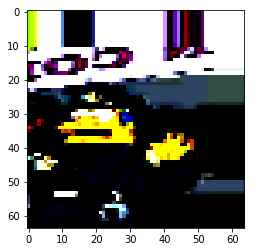

In [145]:
plt.imshow(data[0][1])

In [146]:
inp=Input((64,64,3))
x=Conv2D(32,3,padding='same')(inp)
x=BatchNormalization()(x)
x=Dropout(0.3)(x)
x=Activation('relu')(x)
x=MaxPooling2D()(x)
x=Conv2D(64,3,padding='same')(x)
x=BatchNormalization()(x)
x=Dropout(0.3)(x)
x=Activation('relu')(x)
x=MaxPooling2D()(x)
x=Conv2D(128,3,padding='same')(x)
x=BatchNormalization()(x)
x=Dropout(0.3)(x)
x=Activation('relu')(x)
x=MaxPooling2D()(x)
x=Conv2D(256,3,padding='same')(x)
x=BatchNormalization()(x)
x=Dropout(0.4)(x)
x=Activation('relu')(x)
x=MaxPooling2D()(x)
x=Flatten()(x)
x=Dense(128)(x)
x=BatchNormalization()(x)
x=Dropout(0.3)(x)
x=Activation('relu')(x)
out=Dense(42,activation='softmax')(x)

In [147]:
model=Model(inp,out)

In [148]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_14 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
dropout_14 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
activation_14 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        18496     
__________

In [149]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [150]:
history=model.fit_generator(gen,steps_per_epoch=300,epochs=40,verbose=1,shuffle=True)

Epoch 1/40


/opt/conda/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


300/300 [==============================] - 40s 132ms/step - loss: 2.8910 - acc: 0.2040
Epoch 2/40
300/300 [==============================] - 38s 126ms/step - loss: 2.3476 - acc: 0.3567
Epoch 3/40
300/300 [==============================] - 38s 128ms/step - loss: 2.1054 - acc: 0.4225
Epoch 4/40
300/300 [==============================] - 39s 129ms/step - loss: 1.9083 - acc: 0.4754
Epoch 5/40
300/300 [==============================] - 38s 127ms/step - loss: 1.7680 - acc: 0.5111
Epoch 6/40
300/300 [==============================] - 38s 128ms/step - loss: 1.6375 - acc: 0.5488
Epoch 7/40
300/300 [==============================] - 39s 131ms/step - loss: 1.5151 - acc: 0.5852
Epoch 8/40
300/300 [==============================] - 39s 130ms/step - loss: 1.4555 - acc: 0.6007
Epoch 9/40
300/300 [==============================] - 38s 127ms/step - loss: 1.3969 - acc: 0.6175
Epoch 10/40
300/300 [==============================] - 39s 129ms/step - loss: 1.2992 - acc: 0.6460
Epoch 11/40
300/300 [=========

In [158]:
history.history.keys()

dict_keys(['loss', 'acc'])

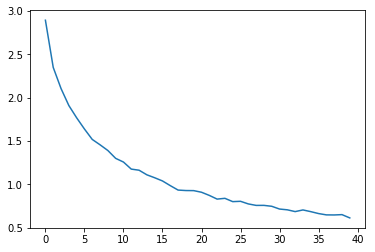

In [159]:
plt.plot(history.history['loss'])

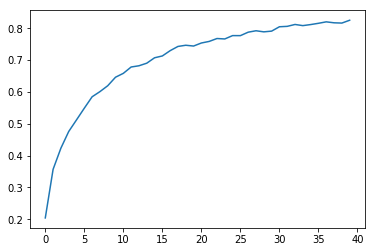

In [160]:
plt.plot(history.history['acc'])

In [90]:
testimagesdir=glob.glob("../input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/*")

In [92]:
def preprocessimage(path):
    img=cv2.imread(path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(64,64))
    return img

In [126]:
xtest=np.array([preprocessimage(i) for i in testimagesdir])

In [130]:
mean=xtest.mean(axis=0)

In [131]:
std=xtest.std(axis=0)

In [132]:
xtest=(xtest-mean)/std

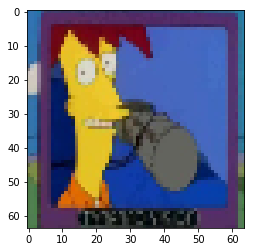

In [129]:
plt.imshow(xtest[0])

In [100]:
xtest.shape

(990, 64, 64, 3)

In [151]:
pred=np.argmax(model.predict(xtest),axis=1)

In [152]:
pred.shape

(990,)

In [155]:
testimagesdir[:5]

['../input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/sideshow_bob_49.jpg',
 '../input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/homer_simpson_8.jpg',
 '../input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/mayor_quimby_1.jpg',
 '../input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/bart_simpson_18.jpg',
 '../input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/milhouse_van_houten_7.jpg']

In [154]:
pred[:5]

array([37, 15, 15, 20, 25])

In [114]:
gen.class_indices

{'abraham_grampa_simpson': 0,
 'agnes_skinner': 1,
 'apu_nahasapeemapetilon': 2,
 'barney_gumble': 3,
 'bart_simpson': 4,
 'carl_carlson': 5,
 'charles_montgomery_burns': 6,
 'chief_wiggum': 7,
 'cletus_spuckler': 8,
 'comic_book_guy': 9,
 'disco_stu': 10,
 'edna_krabappel': 11,
 'fat_tony': 12,
 'gil': 13,
 'groundskeeper_willie': 14,
 'homer_simpson': 15,
 'kent_brockman': 16,
 'krusty_the_clown': 17,
 'lenny_leonard': 18,
 'lionel_hutz': 19,
 'lisa_simpson': 20,
 'maggie_simpson': 21,
 'marge_simpson': 22,
 'martin_prince': 23,
 'mayor_quimby': 24,
 'milhouse_van_houten': 25,
 'miss_hoover': 26,
 'moe_szyslak': 27,
 'ned_flanders': 28,
 'nelson_muntz': 29,
 'otto_mann': 30,
 'patty_bouvier': 31,
 'principal_skinner': 32,
 'professor_john_frink': 33,
 'rainier_wolfcastle': 34,
 'ralph_wiggum': 35,
 'selma_bouvier': 36,
 'sideshow_bob': 37,
 'sideshow_mel': 38,
 'snake_jailbird': 39,
 'troy_mcclure': 40,
 'waylon_smithers': 41}